In [1]:
# This portion needed to mount Google drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/My Drive/Colab Notebooks/NN_project"
models_path = path+"/"+'models/'

isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
  print("NN_project directory is created!")

isExist = os.path.exists(models_path)
if not isExist:
  os.makedirs(models_path)
  print("Models directory is created!")

os.chdir(path)
!ls

Mounted at /content/drive
fruits-360_dataset  fruits-360-original-size  fruits.zip  kaggle.json  models


In [ ]:

print(keras.__version__)

2.7.0


In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
#import cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adam
#from google.colab.patches import cv2_imshow
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical

# Import dataset

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
#copy kaggle.json file 
!cp kaggle.json ~/.kaggle/
!ls

mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json  models


In [ ]:
from os.path import exists
# dataset = "flowers-recognition.zip"
dataset = "fruits.zip"

def downloadDataset():
  # !kaggle datasets download -d alxmamaev/flowers-recognition
  # !unzip flowers-recognition.zip
  
  !kaggle datasets download -d moltean/fruits
  !unzip fruits.zip

is_exists = exists(dataset)#'fruits.zip'
if not is_exists:
  downloadDataset()

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [3]:
batch_size = 256
classes=131
img_size=32
total_images=4317

# Define training and validation data

In [4]:
import os

# create a data generator
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2) #

dataset_path = 'fruits-360_dataset/fruits-360/Training/'
# dataset_path = 'flowers/'


# load and iterate training dataset
train_dataset = datagen.flow_from_directory(directory=dataset_path, 
                                       class_mode='categorical', 
                                       target_size=(img_size, img_size),
                                       color_mode="rgb",
                                       batch_size=batch_size,
                                       subset="training",
                                       shuffle=True,
                                       seed=123)


validation_dataset = datagen.flow_from_directory(directory=dataset_path, 
                                       class_mode='categorical', 
                                       target_size=(img_size, img_size),
                                       color_mode="rgb",
                                       batch_size=batch_size,
                                       subset="validation",
                                       shuffle=True,
                                       seed=123)
# images, labels = next(train_it)

# print(train_dataset.shape)
# print(train_dataset.shape)

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.


# Load ResNet50

In [ ]:
from keras.layers import Activation, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet


input_shape = tf.keras.Input(shape=(img_size, img_size, 3))
# the base pre-trained model
# base_model  = MobileNet(weights=None, include_top=False, input_tensor=input_shape)
base_model  = ResNet50(weights=None, include_top=False, input_tensor=input_shape, classes=classes)
# base_model.summary()


headModel = base_model.output
headModel = GlobalAveragePooling2D()(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation='tanh')(headModel)
headModel = Dropout(0.2)(headModel)

headModel = Dense(classes, activation='softmax')(headModel)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=headModel)

# model.summary()

# Train Model

In [ ]:
# fit model
model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=100, callbacks=None, validation_data=validation_dataset, validation_steps=len(validation_dataset), verbose=1)
# history = model.fit(train_dataset, steps_per_epoch=16, validation_data=validation_dataset, validation_steps=8, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
212/212 [==============================] - 88s 367ms/step - loss: 0.9275 - accuracy: 0.7798 - val_loss: 6.7068 - val_accuracy: 0.0354
Epoch 2/100
212/212 [==============================] - 77s 361ms/step - loss: 0.1161 - accuracy: 0.9696 - val_loss: 1.6623 - val_accuracy: 0.5820
Epoch 3/100
212/212 [==============================] - 75s 354ms/step - loss: 0.0698 - accuracy: 0.9827 - val_loss: 1.6466 - val_accuracy: 0.6188
Epoch 4/100
212/212 [==============================] - 77s 361ms/step - loss: 0.0545 - accuracy: 0.9859 - val_loss: 1.1396 - val_accuracy: 0.7263
Epoch 5/100
212/212 [==============================] - 77s 361ms/step - loss: 0.0501 - accuracy: 0.9875 - val_loss: 2.8755 - val_accuracy: 0.4348
Epoch 6/100
212/212 [==============================] - 77s 361ms/step - loss: 0.0318 - accuracy: 0.9915 - val_loss: 0.5203 - val_accuracy: 0.8985
Epoch 7/100
212/212 [==============================] - 75s 353ms/step - loss: 0.0405 - accuracy: 0.9898 - val_loss: 2.3993 -

### Save model

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/NN_project/models/ResNet_TL_model")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


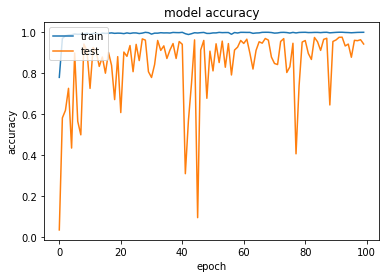

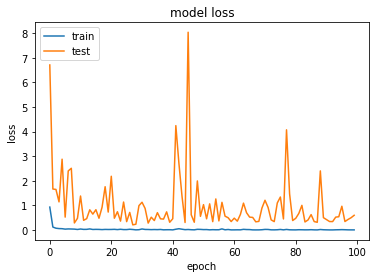

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate model
loss = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


In [ ]:
print(loss)

[0.5407283306121826, 0.942700982093811]


# Model Evaluation and prediction

In [5]:
# Load Saved model
model = load_model("/content/drive/MyDrive/Colab Notebooks/NN_project/models/ResNet_TL_model")

In [6]:
datagen_test = ImageDataGenerator(rescale=1.0/255)
dataset_path_test = 'fruits-360_dataset/fruits-360/Test/'

test_dataset = datagen_test.flow_from_directory(directory=dataset_path_test, 
                                       class_mode='categorical', 
                                       target_size=(img_size, img_size),
                                       color_mode="rgb",
                                       batch_size=batch_size,
                                       seed=123)

Found 22688 images belonging to 131 classes.


In [7]:
loss, acc = model.evaluate(test_dataset, batch_size=4)
print('\nTest accuracy: ',round((100.0 * acc),2), '%')

89/89 [==============================] - 7417s 84s/step - loss: 0.5407 - accuracy: 0.9427

Test accuracy:  94.27 %


In [ ]:
# make a prediction
y_pred = model.predict_generator(test_dataset)